In [1]:
# uncomment to install libraries
#!pip install pandas numpy matplotlib seaborn sympy dowhy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('data/churn.csv', index_col=0)
df.head()

,host_is_superhost,price,room_type,accommodates,review_scores_cleanliness,review_scores_location,review_scores_rating,host_identity_verified,host_response_time,host_response_rate,host_has_profile_pic,availability_365,calculated_host_listings_count,calendar_updated,minimum_nights,number_of_reviews,reviews_per_month,neighbourhood,churn,days_since_last_review
19444,f,200.0,Entire home/apt,3,10.0,10.0,99.0,f,a few days or more,0.0,f,243.0,1.0,4 months ago,7,4,0.0,Williamsburg,True,850.0
1520,f,450.0,Entire home/apt,4,10.0,10.0,94.0,f,a few days or more,0.0,f,208.0,1.0,2 weeks ago,3,7,0.0,Tribeca,True,505.0
1517,f,28.0,Shared room,1,0.0,0.0,0.0,f,a few days or more,0.0,f,364.0,1.0,6 weeks ago,1,0,0.0,Soundview,True,3650.0
21691,f,48.0,Private room,2,8.0,6.0,80.0,f,a few days or more,0.0,f,143.0,1.0,4 months ago,1,1,0.0,Harlem,True,612.0
21706,f,160.0,Private room,2,0.0,0.0,0.0,f,a few days or more,0.0,f,365.0,1.0,2 months ago,1,0,0.0,Tribeca,True,3650.0


In [4]:
drop_columns = ['calendar_updated', 'review_scores_cleanliness', 'minimum_nights']
df.drop(drop_columns, axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77201 entries, 19444 to 0
Data columns (total 17 columns):
host_is_superhost                 77201 non-null object
price                             77201 non-null float64
room_type                         77201 non-null object
accommodates                      77201 non-null int64
review_scores_location            77201 non-null float64
review_scores_rating              77201 non-null float64
host_identity_verified            77201 non-null object
host_response_time                77201 non-null object
host_response_rate                77201 non-null float64
host_has_profile_pic              77201 non-null object
availability_365                  77201 non-null float64
calculated_host_listings_count    77201 non-null float64
number_of_reviews                 77201 non-null int64
reviews_per_month                 77201 non-null float64
neighbourhood                     66768 non-null object
churn                             77201 non-nu

In [5]:
# filter outliers with unusually high prices and listings without reviews
df_robust = df[(df.price < df.price.quantile(.99)) & (df.reviews_per_month > 1)].drop(drop_columns, axis=1)
df_robust

,host_is_superhost,price,room_type,accommodates,review_scores_location,review_scores_rating,host_identity_verified,host_response_time,host_response_rate,host_has_profile_pic,availability_365,calculated_host_listings_count,number_of_reviews,reviews_per_month,neighbourhood,churn,days_since_last_review
22815,t,79.0,Private room,1,10.0,98.0,f,within a day,100.0,f,181.0,2.0,99,1.50,Upper West Side,True,503.0
22817,f,210.0,Entire home/apt,3,10.0,92.0,f,within a few hours,89.0,f,365.0,1.0,15,1.10,Upper West Side,True,517.0
24200,f,100.0,Entire home/apt,2,9.0,96.0,f,within an hour,100.0,f,0.0,1.0,7,2.80,Washington Heights,True,429.0
23811,f,200.0,Entire home/apt,6,10.0,100.0,f,within a day,70.0,f,79.0,1.0,15,2.00,Upper West Side,True,429.0
23421,f,180.0,Entire home/apt,2,10.0,100.0,f,within a few hours,100.0,f,0.0,1.0,6,1.20,Upper West Side,True,438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21715,f,220.0,Entire home/apt,5,10.0,87.0,f,within an hour,100.0,t,268.0,2.0,6,4.29,Midtown East,False,7.0
21719,t,349.0,Entire home/apt,12,10.0,95.0,t,within a few hours,100.0,t,351.0,1.0,4,1.67,NaN,False,34.0
21723,f,59.0,Private room,1,10.0,80.0,t,within an hour,100.0,t,202.0,1.0,41,1.50,Midtown East,False,9.0
21712,f,235.0,Entire home/apt,2,9.0,90.0,f,within a few hours,90.0,t,104.0,1.0,4,2.45,Midtown,False,9.0


In [6]:
# filter neighborhoods with at leastt 10 listings
neighborhood_ind = df_robust.neighbourhood.value_counts()[df_robust.neighbourhood.value_counts() > 25]

In [7]:
neighborhood_ind.index

Index(['Williamsburg', 'Hell's Kitchen', 'Bedford-Stuyvesant',
       'Upper East Side', 'Upper West Side', 'East Village', 'Harlem',
       'Bushwick', 'Lower East Side', 'Chelsea', 'East Harlem',
       'Crown Heights', 'Alphabet City', 'Astoria', 'West Village',
       'Washington Heights', 'Hamilton Heights', 'Greenpoint', 'Midtown East',
       'Park Slope', 'Clinton Hill', 'Midtown', 'Greenwich Village',
       'Kips Bay', 'Flatbush', 'Financial District', 'Chinatown', 'Soho',
       'Fort Greene', 'Nolita', 'Gramercy Park', 'Lefferts Garden',
       'Flatiron District', 'Murray Hill', 'Prospect Heights', 'Boerum Hill',
       'Sunnyside', 'Long Island City', 'Times Square/Theatre District',
       'Ridgewood', 'Morningside Heights', 'Sunset Park', 'Ditmars / Steinway',
       'Jamaica', 'Carroll Gardens', 'Flushing', 'Tribeca', 'Jackson Heights',
       'Downtown Brooklyn', 'Brooklyn Heights', 'Meatpacking District',
       'Elmhurst', 'Inwood', 'East Flatbush', 'Union Square', 

In [8]:
df_sample = df_robust[df_robust.neighbourhood.isin(neighborhood_ind.index)]
df_sample

,host_is_superhost,price,room_type,accommodates,review_scores_location,review_scores_rating,host_identity_verified,host_response_time,host_response_rate,host_has_profile_pic,availability_365,calculated_host_listings_count,number_of_reviews,reviews_per_month,neighbourhood,churn,days_since_last_review
22815,t,79.0,Private room,1,10.0,98.0,f,within a day,100.0,f,181.0,2.0,99,1.50,Upper West Side,True,503.0
22817,f,210.0,Entire home/apt,3,10.0,92.0,f,within a few hours,89.0,f,365.0,1.0,15,1.10,Upper West Side,True,517.0
24200,f,100.0,Entire home/apt,2,9.0,96.0,f,within an hour,100.0,f,0.0,1.0,7,2.80,Washington Heights,True,429.0
23811,f,200.0,Entire home/apt,6,10.0,100.0,f,within a day,70.0,f,79.0,1.0,15,2.00,Upper West Side,True,429.0
23421,f,180.0,Entire home/apt,2,10.0,100.0,f,within a few hours,100.0,f,0.0,1.0,6,1.20,Upper West Side,True,438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21727,f,150.0,Entire home/apt,6,10.0,83.0,t,within an hour,100.0,t,256.0,1.0,82,2.58,Midtown East,False,20.0
21711,f,360.0,Entire home/apt,4,10.0,97.0,t,within an hour,91.0,t,308.0,1.0,100,1.76,Midtown,False,23.0
21715,f,220.0,Entire home/apt,5,10.0,87.0,f,within an hour,100.0,t,268.0,2.0,6,4.29,Midtown East,False,7.0
21723,f,59.0,Private room,1,10.0,80.0,t,within an hour,100.0,t,202.0,1.0,41,1.50,Midtown East,False,9.0


In [9]:
df_sample.corr()

,price,accommodates,review_scores_location,review_scores_rating,host_response_rate,availability_365,calculated_host_listings_count,number_of_reviews,reviews_per_month,churn,days_since_last_review
price,1.000000,0.531858,0.184219,0.068662,0.003928,0.053212,-0.150241,-0.016340,-0.056087,0.071592,0.043644
accommodates,0.531858,1.000000,-0.066920,-0.079421,0.050685,0.092481,0.047068,0.016198,0.030123,0.008468,-0.012861
review_scores_location,0.184219,-0.066920,1.000000,0.670468,0.043586,-0.101734,-0.121352,0.008041,-0.007762,-0.046526,-0.051390
review_scores_rating,0.068662,-0.079421,0.670468,1.000000,0.089846,-0.112047,-0.147862,0.042767,-0.020539,-0.124145,-0.102509
host_response_rate,0.003928,0.050685,0.043586,0.089846,1.000000,-0.019780,0.105278,0.086111,0.180173,-0.162835,-0.208425
availability_365,0.053212,0.092481,-0.101734,-0.112047,-0.019780,1.000000,0.150568,0.107545,-0.032877,0.056999,0.053499
calculated_host_listings_count,-0.150241,0.047068,-0.121352,-0.147862,0.105278,0.150568,1.000000,-0.016278,0.081551,0.010646,0.040069
number_of_reviews,-0.016340,0.016198,0.008041,0.042767,0.086111,0.107545,-0.016278,1.000000,0.240824,-0.208308,-0.169266
reviews_per_month,-0.056087,0.030123,-0.007762,-0.020539,0.180173,-0.032877,0.081551,0.240824,1.000000,-0.053228,-0.128557
churn,0.071592,0.008468,-0.046526,-0.124145,-0.162835,0.056999,0.010646,-0.208308,-0.053228,1.000000,0.766564


In [10]:
# may take long to compute

#fig = plt.figure(figsize=(10,10))
#sns.pairplot(df_sample, hue="room_type", height=5)

In [11]:
df_sample.groupby('neighbourhood').reviews_per_month.mean().sort_values()[:-30:-1]

neighbourhood
Jamaica                          2.771143
Midtown                          2.722911
Hell's Kitchen                   2.646255
Corona                           2.614667
Flushing                         2.558000
Times Square/Theatre District    2.548295
East Village                     2.492773
Mott Haven                       2.488148
Bedford-Stuyvesant               2.483807
Ditmars / Steinway               2.478356
Gowanus                          2.441795
Bushwick                         2.437002
Astoria                          2.435036
East Harlem                      2.405789
Union Square                     2.405319
East Flatbush                    2.365208
Kips Bay                         2.364806
Ridgewood                        2.352169
Nolita                           2.339801
Williamsburg                     2.332197
Chelsea                          2.320615
Hamilton Heights                 2.318769
Washington Heights               2.303174
Soho                

In [12]:
df_sample.groupby('neighbourhood').price.mean().sort_values()[:-30:-1]

neighbourhood
Tribeca                          296.089286
Soho                             262.210526
Flatiron District                232.636364
Union Square                     225.021277
West Village                     215.951220
Midtown                          209.544304
Meatpacking District             203.220000
Times Square/Theatre District    202.602273
Greenwich Village                197.130435
Battery Park City                196.896552
Chelsea                          196.640385
Nolita                           191.741722
Financial District               191.158470
Gramercy Park                    186.510204
Murray Hill                      183.650943
Hell's Kitchen                   182.109577
Midtown East                     181.972441
Kips Bay                         178.533981
Little Italy                     177.650000
East Village                     171.540832
Carroll Gardens                  167.046154
Upper West Side                  163.148387
Brooklyn Heights  

In [13]:
df_sample.groupby('churn')['price', 
                           'reviews_per_month', 
                           'number_of_reviews', 
                           'host_response_time', 
                           'host_response_rate',                     
                           'calculated_host_listings_count',
                           'days_since_last_review',
                           'review_scores_rating'].mean()

,price,reviews_per_month,number_of_reviews,host_response_rate,calculated_host_listings_count,days_since_last_review,review_scores_rating
churn,,,,,,,
False,135.84452,2.380221,36.016897,91.151960,2.119221,30.341352,92.089181
True,149.24813,2.248421,22.184329,84.518025,2.181200,237.820705,89.591756


## doWhy

In [14]:
import dowhy
from dowhy.do_why import CausalModel

In [15]:
df_sample.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
df_why = df_sample.copy()

In [17]:
df_why['host_is_superhost'] = df_sample.host_is_superhost == 't'

In [18]:
model=CausalModel(
        data=df_why,
        treatment='host_is_superhost',
        outcome='price',
        common_causes=['room_type', 
                        'accommodates',                     
                        'review_scores_rating'])

INFO:dowhy.do_why:Model to find the causal effect of treatment ['host_is_superhost'] on outcome ['price']


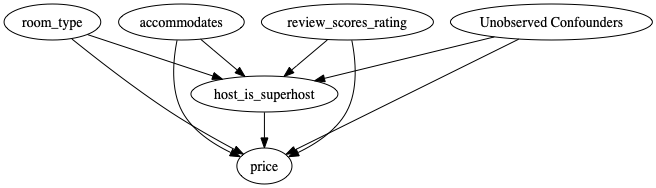

In [19]:
from IPython.display import Image, display

model.view_model(layout="dot")
display(Image(filename="causal_model.png"))

In [20]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['review_scores_rating', 'room_type', 'U', 'accommodates']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


In [21]:
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_matching")

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: price~host_is_superhost+review_scores_rating+room_type+accommodates


![](http://nickchk.com/anim/Animation%20of%20Matching.gif)

In [22]:
print(estimate)

*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
─────────────────(Expectation(price|review_scores_rating,room_type,accommodate
dhostᵢₛ ₛᵤₚₑᵣₕₒₛₜ                                                             

   
s))
   
Estimand assumption 1, Unconfoundedness: If U→host_is_superhost and U→price then P(price|host_is_superhost,review_scores_rating,room_type,accommodates,U) = P(price|host_is_superhost,review_scores_rating,room_type,accommodates)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: price~host_is_superhost+review_scores_rating+room_type+accommodates
## Estimate
Value: -13.681159420289855



In [23]:
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")
print(refute_results)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: price~host_is_superhost+review_scores_rating+room_type+accommodates+w_random


Refute: Add a Random Common Cause
Estimated effect:(-13.681159420289855,)
New effect:(7.795783926218709,)



In [24]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: price~placebo+review_scores_rating+room_type+accommodates


Refute: Use a Placebo Treatment
Estimated effect:(-13.681159420289855,)
New effect:(-0.5889328063241107,)



In [25]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: price~host_is_superhost+review_scores_rating+room_type+accommodates


Refute: Use a subset of data
Estimated effect:(-13.681159420289855,)
New effect:(6.584187408491947,)



## Update Model with Neighborhood Common Cause

In [26]:
model=CausalModel(
        data=df_why,
        treatment='host_is_superhost',
        outcome='price',
        common_causes=['neighbourhood', 
                        'room_type', 
                        'accommodates',                     
                        'review_scores_rating'])

INFO:dowhy.do_why:Model to find the causal effect of treatment ['host_is_superhost'] on outcome ['price']


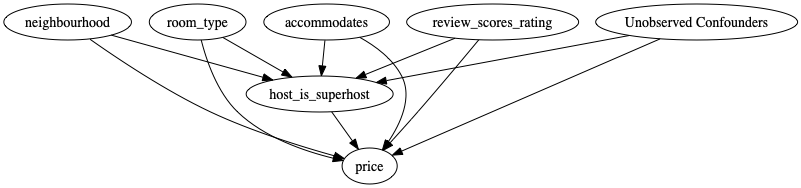

In [27]:
from IPython.display import Image, display

model.view_model(layout="dot")
display(Image(filename="causal_model.png"))

In [28]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_matching")
print(f"New causal Estimate with neighbourhood is:  {estimate.value}")

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['room_type', 'review_scores_rating', 'accommodates', 'U', 'neighbourhood']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: price~host_is_superhost+room_type+review_scores_rating+accommodates+neighbourhood


New causal Estimate with neighbourhood is:  12.168642951251647


In [29]:
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")
print(refute_results)

res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: price~host_is_superhost+room_type+review_scores_rating+accommodates+neighbourhood+w_random
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: price~placebo+room_type+review_scores_rating+accommodates+neighbourhood


Refute: Add a Random Common Cause
Estimated effect:(12.168642951251647,)
New effect:(8.53227931488801,)



INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: price~host_is_superhost+room_type+review_scores_rating+accommodates+neighbourhood


Refute: Use a Placebo Treatment
Estimated effect:(12.168642951251647,)
New effect:(-0.3557312252964427,)

Refute: Use a subset of data
Estimated effect:(12.168642951251647,)
New effect:(13.174486803519061,)

